**EDA**

- Comportamiento & problema

- Cuantitativas:
    - Discreto (conteo): número de hijos
    - Continuo: % de aprobación o % asistencia

- Cualitativas:
    - nominales: sexo (masculino & femenino)
    - ordinales: nivel educativo
    - multinominales: estado civil (soltero, casado, viudo & divorciado)

**Ingeniería de características & preprocesamiento de datos**

- valores ausentes o faltantes o null [completitud] ---> imputación (reemplazar valores faltantes por calculados)
- Valores atípicos ---> (transformación)
- Categorías no previstas  ---> eliminarlas
- sin formato ---> formato
- sin codificar ---> codificarlas
- Diferentes escalas de medida ---> escalarlas (estandarización & normalización)
- predictores correlacionados (multicolinealidad)---> reducción de la dimensionalidad (PCA, FA o LDA)
- predictores no discretizados (convertir a variable cualitativa)---> discretización (K-means, intervalos de igual amplitud, intervalos de igual frecuencia, entropia, etc)
- target (buscamos modelar) desbalanceado---> balancearlos (oversampling , undersampling, Smote and Tomek)
- target no normal - cuantitativas (supuesto estadístico) ---> normalización
- duplicados ---> eliminarlos

**Valores ausentes & técnicas de imputación**

In [4]:
import pandas as pd
import numpy as np

In [5]:
mark2=pd.read_csv(R"C:\Users\sergi\OneDrive\Documentos\SIR_personal\Python_SDC_HP-i3\MarketingDirecto_2.csv", sep=";")

In [6]:
mark2.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [7]:
mark2.isnull().sum()/len(mark2)*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         1.3
dtype: float64

**imputación**: es la tarea de reemplazar valores faltantes por valores calculados

**Niveles de pérdida de información**

- 0.1% - 1% valores faltantes su perdida es trivial (insignificante)
- 1% - 5% valores faltante requieren de una técnica para recuperar información
- 5% - 30% se requieren de métodos más sofisticados (modelos de ML) para recuperar información

**tres estrategias frente a la ausencia de valores**

1. eliminar las filas con valores faltantes
2. imputar
3. mantener los valores faltantes ya que existen modelo de aprendizaje que tratan internamente a estos NAs

In [8]:
################################################
"Regresión"

'Regresión'

In [9]:
edad = [25,35,28,29,29]#x
peso = [75,65,68,"NA",72]#y

In [11]:
edad = [25,35,28,29]
peso = [75,65,68,72]

In [12]:
df=pd.DataFrame({"edad": edad,
                "peso": peso})

In [13]:
df

,edad,peso
0,25,75
1,35,65
2,28,68
3,29,72


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()

In [16]:
y_train=df[["peso"]]
x_train=df[["edad"]]

In [17]:
lm.fit(x_train, #predictores
       y_train) #target
#fit(): iniciar un proceso de aprendizaje

LinearRegression()

**¿Cómo calcular ese NA?**

In [18]:
lm.intercept_

array([96.61611374])

In [19]:
lm.coef_

array([[-0.90995261]])

In [20]:
list(lm.intercept_+(lm.coef_*29))

[array([70.22748815])]

In [21]:
NA=70.23

**SimpleImputer()**

In [22]:
from sklearn.impute import SimpleImputer

strategy=

- "mean": imputación por la media
- "median": imputación por la mediana
- "most_frequent": imputación por la moda

In [23]:
imp_media = SimpleImputer(missing_values=np.nan,
                         strategy="mean")

In [24]:
imp_mediana = SimpleImputer(missing_values=np.nan,
                         strategy="median")

In [25]:
imp_moda = SimpleImputer(missing_values=np.nan,
                         strategy="most_frequent")

- **Historial**: variable cualitativa
- **Monto**: variable cualitativa

In [26]:
mark2[["Historial"]]=imp_moda.fit_transform(mark2[["Historial"]])

**fit(): identifica cúal es la categoría de la variable historial más frecuente**

In [28]:
imp_moda.fit(mark2[["Historial"]])

SimpleImputer(strategy='most_frequent')

**transform(): aplica la transformación guardado en el objeto imp_moda**

In [29]:
mark2[["Monto"]]=imp_media.transform(mark2[["Monto"]])

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [30]:
imp_moda.transform(mark2[["Historial"]])

array([['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Bajo'],
       ['Bajo'],
       ['Medio'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
    

In [31]:
imp_moda.fit_transform(mark2[["Historial"]])

array([['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Bajo'],
       ['Bajo'],
       ['Medio'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
    

- fit(): aprendizaje
- fit_transform(): aprendizaje + transformación
- transform(): transformación

In [32]:
mark2[["Monto"]]=imp_media.fit_transform(mark2[["Monto"]])

In [33]:
mark2.isnull().sum()/len(mark2)*100

Edad         0.0
Genero       0.0
Vivienda     0.0
Ecivil       0.0
Ubicacion    0.0
Salario      0.0
Hijos        0.0
Historial    0.0
Catalogos    0.0
Monto        0.0
dtype: float64

**Nota**: a los datos train al aplicar fit_transform() he calculado un valor de media de la variable "edad" igual a 35

**Nota**: yo no puedo aplicar a los datos de testeo fit_transform porque podría cambiar el valor de media y ahora ser 37

**Nota final**: para asegurarme que el criterio de imputación se mantenga debo usar fit() o fit_transform() en mis datos de entrenamiento y sólo transform() en mis datos de testeo

**Imputación supervisada**

- cuantitativa & los niveles de pérdida de información >5% se recomienda imputar por regresión (lineal).
- cualitativa & los niveles de perdida de información >5% se recomienda imputar por modelo de clasificación

In [34]:
mark2=pd.read_csv(R"C:\Users\sergi\OneDrive\Documentos\SIR_personal\Python_SDC_HP-i3\MarketingDirecto_2.csv", sep=";")

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [36]:
mark2.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto         13
dtype: int64

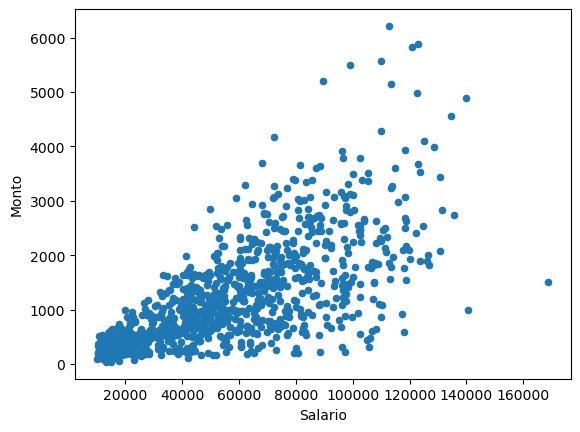

In [37]:
mark2.plot.scatter(x="Salario",y="Monto")
plt.show()

**Nota**: si nosotros queremos recuperar (imputar) los valores de la variable monto en función a salario estas variables tienen que guardar una relación lineal (acercarse a ese tipo de relación)

**Paso 1**: crear el conjunto de datos donde la variable monto presente valores incompletos

In [38]:
es_nulo= pd.isna(mark2.loc[:,"Monto"])

In [39]:
df_nulos=mark2.loc[es_nulo]

In [40]:
df_nulos.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN
15,Media,Femenino,Propia,Casado,Lejos,83100,1,NaN,12,NaN
132,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,NaN,6,NaN
137,Media,Femenino,Propia,Soltero,Cerca,53700,3,Bajo,12,NaN
142,Media,Masculino,Propia,Casado,Lejos,103700,1,Alto,24,NaN


**Paso 2**: crear el conjunto de datos donde la variable monto presente valores completos

In [41]:
es_nulo2= es_nulo.replace({True:False, False:True})

In [42]:
df_data = mark2.loc[es_nulo2]

In [43]:
df_data.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
5,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0


**Paso 3**: Imputación por modelo de regresión 

In [45]:
x = df_data[["Salario"]]
y = df_data[["Monto"]]

¿A qué DataFrame vamos a imputar? (en este caso es df_nulos)

In [48]:
x_test = df_nulos[["Salario"]]
y_test = df_nulos[["Monto"]]

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
regresion = LinearRegression()

In [51]:
regresion.fit(x,y)

LinearRegression()

In [52]:
LinearRegression()

LinearRegression()

In [53]:
df_nulos["Monto"] = np.round(regresion.predict(x_test),0)

C:\Users\sergi\AppData\Local\Temp\ipykernel_27324\1519344187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nulos["Monto"] = np.round(regresion.predict(x_test),0)


In [54]:
df_nulos.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1491.0
15,Media,Femenino,Propia,Casado,Lejos,83100,1,NaN,12,1814.0
132,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,NaN,6,405.0
137,Media,Femenino,Propia,Soltero,Cerca,53700,3,Bajo,12,1167.0
142,Media,Masculino,Propia,Casado,Lejos,103700,1,Alto,24,2268.0


**Paso 4**: Reseteo de indices de objetos (DataFrame)

In [55]:
df_nulos = df_nulos.reset_index(drop=True)

In [56]:
df_data = df_data.reset_index(drop=True)

**Paso 5**: Concatenar los dataframe

In [58]:
df_imputados = pd.concat([df_nulos, df_data], axis=0)

In [59]:
df_imputados.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto          0
dtype: int64

**IMPUTACIÓN DE UNA VARIABLE CUALITATIVA MEDIANTE UN MODLEO DE REGRESIÓN  HISTORIAL VARIABLE CUALITATIVA ORDINAL**

**Técnicas de balanceo de datos**